In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('whitegrid')

In [2]:
#import dataset
dataset = pd.read_csv('Falcon9_Dataset_Part2.csv')

In [3]:
dataset.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCounts,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6123.547647,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


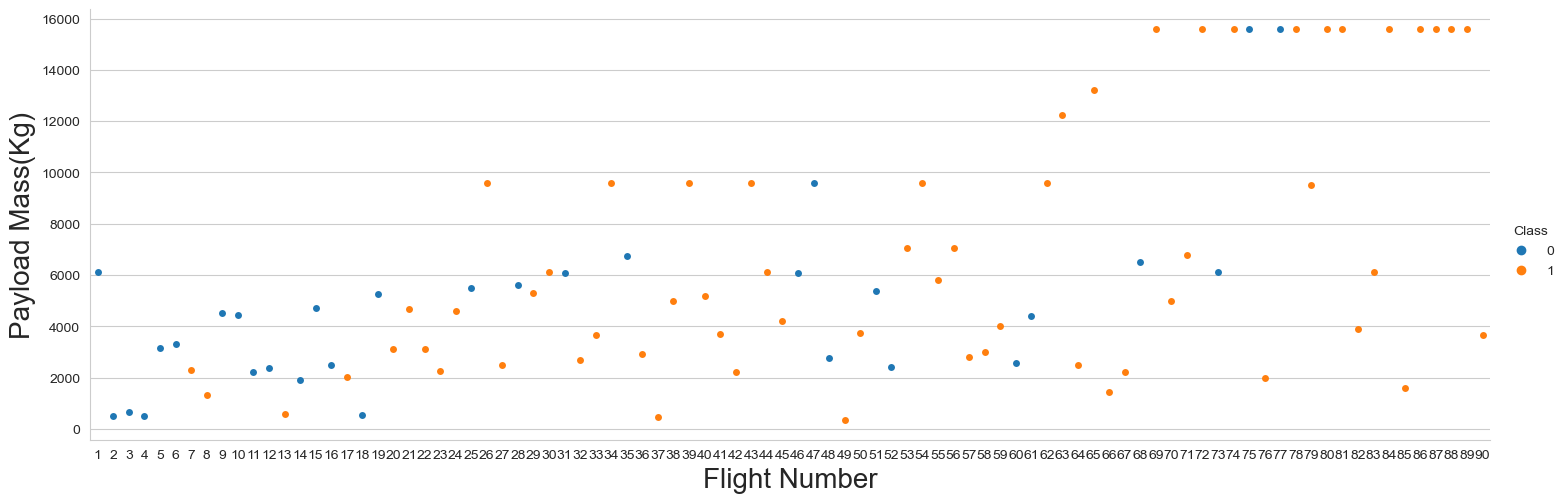

In [4]:
sns.catplot(x = "FlightNumber",y = "PayloadMass",data = dataset,hue = "Class",aspect=3)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Payload Mass(Kg)",fontsize=20)
plt.show()

# Task1

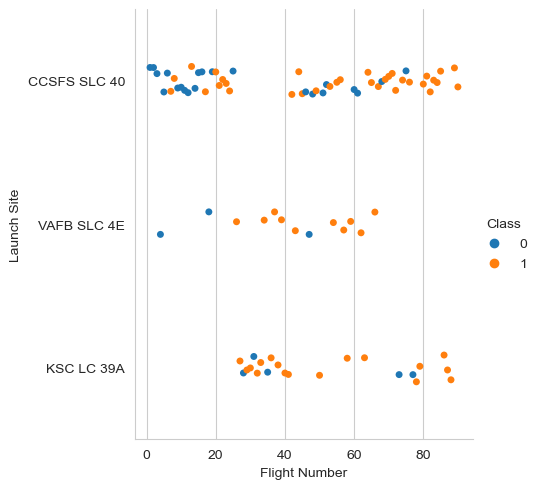

In [5]:
#Visualize the relationship between Launchsite and flightnumber
sns.catplot(x = 'FlightNumber',y='LaunchSite',data=dataset,hue='Class')
plt.xlabel('Flight Number')
plt.ylabel('Launch Site')
plt.show()

# Task2

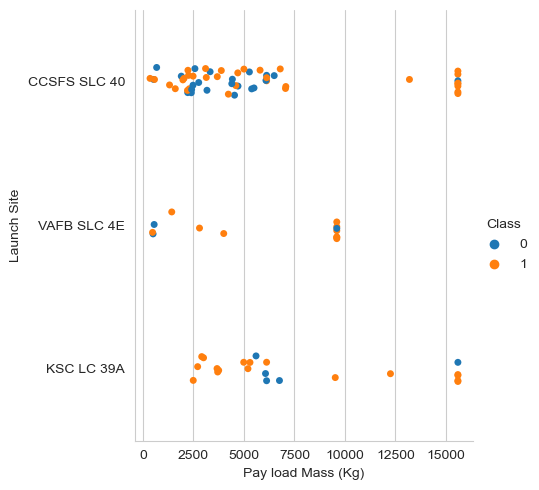

In [6]:
#relationship between payload and launchsite
sns.catplot(x = 'PayloadMass',y='LaunchSite',data=dataset,hue='Class')
plt.xlabel('Pay load Mass (Kg)')
plt.ylabel('Launch Site')
plt.show()

# Task3

In [7]:
#Visualize between success rate of each orbit type
dataset_groubby_orbit = pd.DataFrame(dataset.groupby('Orbit')['Class'].mean()).reset_index()

In [8]:
dataset_groubby_orbit

,Orbit,Class
0,ES-L1,1.000000
1,GEO,1.000000
2,GTO,0.518519
3,HEO,1.000000
4,ISS,0.619048
5,LEO,0.714286
6,MEO,0.666667
7,PO,0.666667
8,SO,0.000000
9,SSO,1.000000


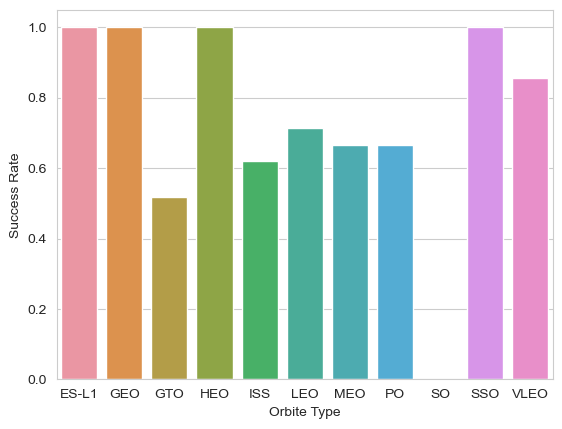

In [9]:
sns.barplot(x = 'Orbit',y='Class',data=dataset_groubby_orbit)
plt.xlabel('Orbite Type')
plt.ylabel('Success Rate')
plt.show()

# Task4

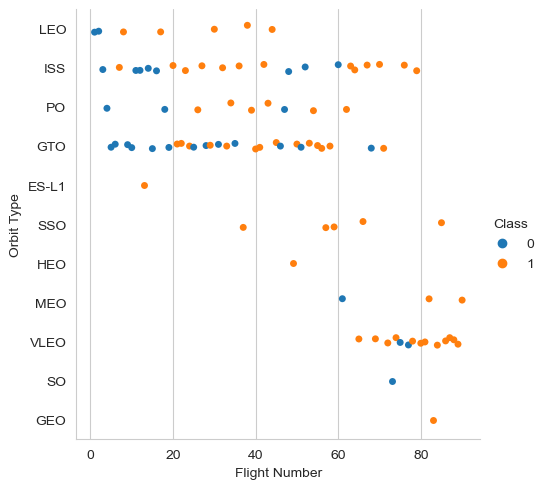

In [12]:
#Visualize relationship between 
sns.catplot(x = 'FlightNumber',y='Orbit',data=dataset,hue='Class')
plt.xlabel('Flight Number')
plt.ylabel('Orbit Type')
plt.show()

# Task5

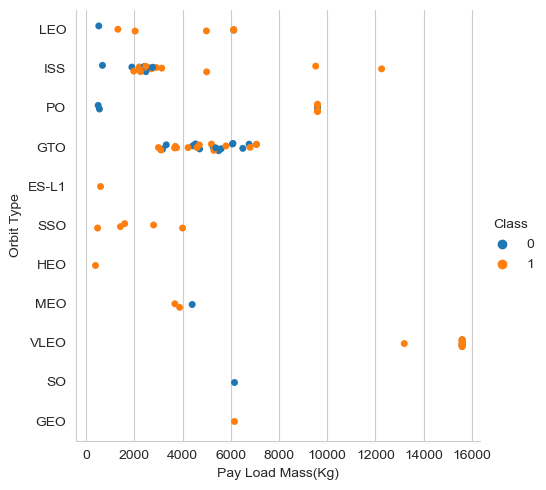

In [13]:
#relationship between payloadmass and orbit type
sns.catplot(x = 'PayloadMass',y = 'Orbit',data=dataset,hue='Class')
plt.xlabel('Pay Load Mass(Kg)')
plt.ylabel('Orbit Type')
plt.show()

# Task6

In [21]:
#visualize the launch success yearly trend
#define a function to extract the year from date and add
#a new coulmn to our dataset with name Year
Year = []
def ExtractYear():
    for i in dataset['Date']:
        Year.append(i.split("-")[0])
    return Year

In [23]:
dataset['Year']=Year

In [24]:
dataset.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCounts,Serial,Longitude,Latitude,Class,Year
0,1,2010-06-04,Falcon 9,6123.547647,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0,2010
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0,2012
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0,2013
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0,2013
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0,2013


In [32]:
dataset_groupby_year = pd.DataFrame(dataset.groupby('Year')['Class'].mean()).reset_index()

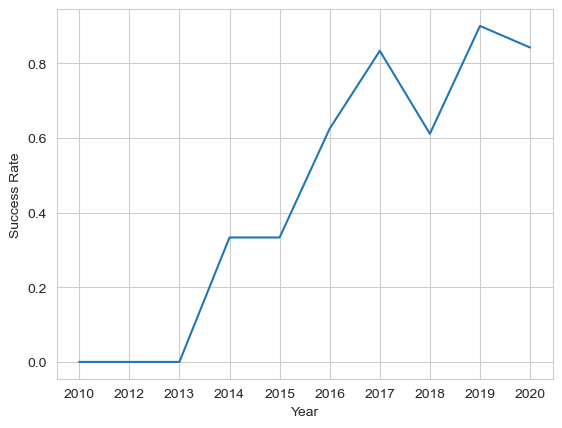

In [33]:
sns.lineplot(x = 'Year',y='Class',data=dataset_groupby_year)
plt.xlabel('Year')
plt.ylabel('Success Rate')
plt.show()

In [36]:
features = dataset[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'Reused', 'Serial']]

In [37]:
features.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,Reused,Serial
0,1,6123.547647,LEO,CCSFS SLC 40,1,False,False,False,NaN,1.0,False,B0003
1,2,525.000000,LEO,CCSFS SLC 40,1,False,False,False,NaN,1.0,False,B0005
2,3,677.000000,ISS,CCSFS SLC 40,1,False,False,False,NaN,1.0,False,B0007
3,4,500.000000,PO,VAFB SLC 4E,1,False,False,False,NaN,1.0,False,B1003
4,5,3170.000000,GTO,CCSFS SLC 40,1,False,False,False,NaN,1.0,False,B1004


# Task7

In [41]:
#encoding dummy variables for Orbit
feature_one_hot = pd.get_dummies(features,columns=['Orbit','LaunchSite','LandingPad','Serial'])

In [43]:
feature_one_hot.head()

,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,Reused,Orbit_ES-L1,Orbit_GEO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1,6123.547647,1,False,False,False,1.0,False,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,525.000000,1,False,False,False,1.0,False,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,677.000000,1,False,False,False,1.0,False,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,500.000000,1,False,False,False,1.0,False,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,3170.000000,1,False,False,False,1.0,False,0,0,...,0,0,0,0,0,0,0,0,0,0


# Task8

In [48]:
#Cast all numeric columns to float
new_dataset = feature_one_hot.astype('float64')

In [49]:
new_dataset.dtypes

FlightNumber    float64
PayloadMass     float64
Flights         float64
GridFins        float64
Reused          float64
                 ...   
Serial_B1056    float64
Serial_B1058    float64
Serial_B1059    float64
Serial_B1060    float64
Serial_B1062    float64
Length: 80, dtype: object

In [50]:
new_dataset.to_csv('Falcon9_Dataset_Part3.csv',index=False)

In [51]:
new_dataset.shape

(90, 80)